# MVD 7. cvičení

## 1. část - Vytvoření dat

V dnešním cvičení je před implementací shlukování potřeba vygenerovat vlastní data. Cílem je vytvořit několik datasetů dle předlohy a vizualizovat je. Postačí dosažení podobného pozice a rozložení bodů.

In [110]:
import sklearn.datasets as skds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [169]:
def vizualise_data(x, y, cluster_num: int, centroids=None):
    colors = ['blue', 'red', 'magenta', 'green']
    plt.figure(figsize=(12, 8))

    # Per cluster number
    for cluster in range(cluster_num):
        # Extract all current cluster samples and plot them
        cluster_samples = x[y == cluster]
        plt.scatter(x=cluster_samples[:, 0], y=cluster_samples[:, 1], color=colors[cluster], label=str(cluster), s=20)

        if centroids is not None:
            plt.scatter(x=centroids[cluster][0], y=centroids[cluster][1], marker='x', color=colors[cluster], s=30)

    plt.legend(title='label')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

In [101]:
def create_dataframe(x, y) -> pd.DataFrame:
    dataset = pd.DataFrame(x, columns=['x', 'y'])
    dataset['label'] = y
    dataset['kmeans'] = [0 for _ in range(y.size)]
    return dataset

### 1. dataset - 2 třídy, 100 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset1.png)

Připravený dataset pro další úlohu (k-means) může vypadat například takto:
![prepared](expected_outputs/prepared_dataset.png)

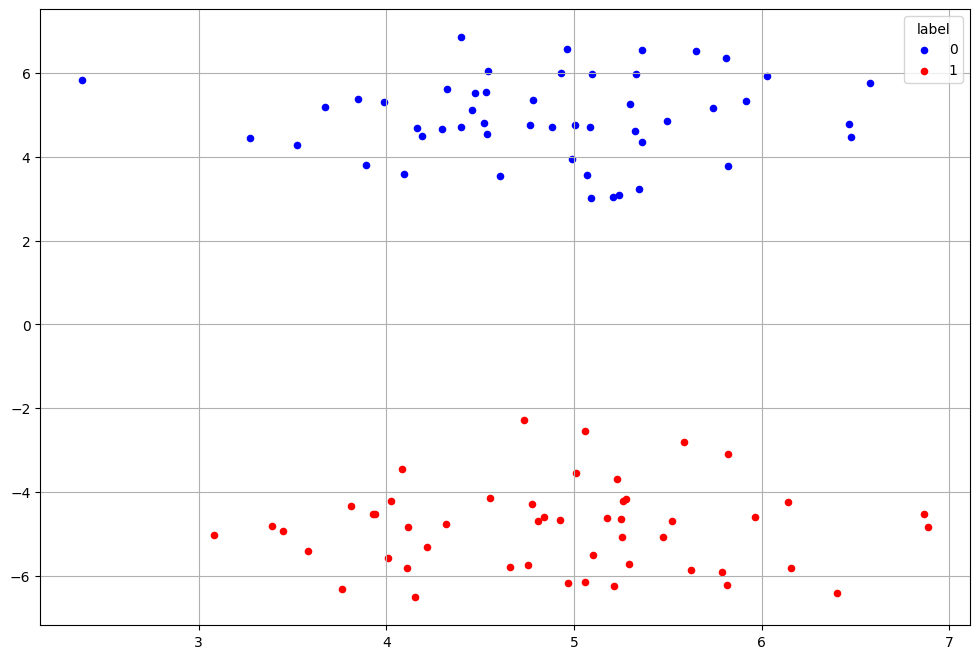

In [102]:
centers = [[5, 5], [5, -5]]
x, y = skds.make_blobs(
    n_samples=100,
    centers=centers, 
    random_state=42
    )
vizualise_data(x, y, cluster_num=len(centers))

In [103]:
dataset1 = create_dataframe(x, y)
dataset1

,x,y,label,kmeans
0,5.473238,-5.072829,1,0
1,4.160782,4.690788,0,0
2,3.081229,-5.026514,1,0
3,4.520826,4.814341,0,0
4,4.025318,-4.212915,1,0
...,...,...,...,...
95,3.987169,5.314247,0,0
96,5.812526,6.356240,0,0
97,4.986503,3.942289,0,0
98,4.735343,-2.279831,1,0


### 2. dataset - 4 třídy, 200 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset2.png)

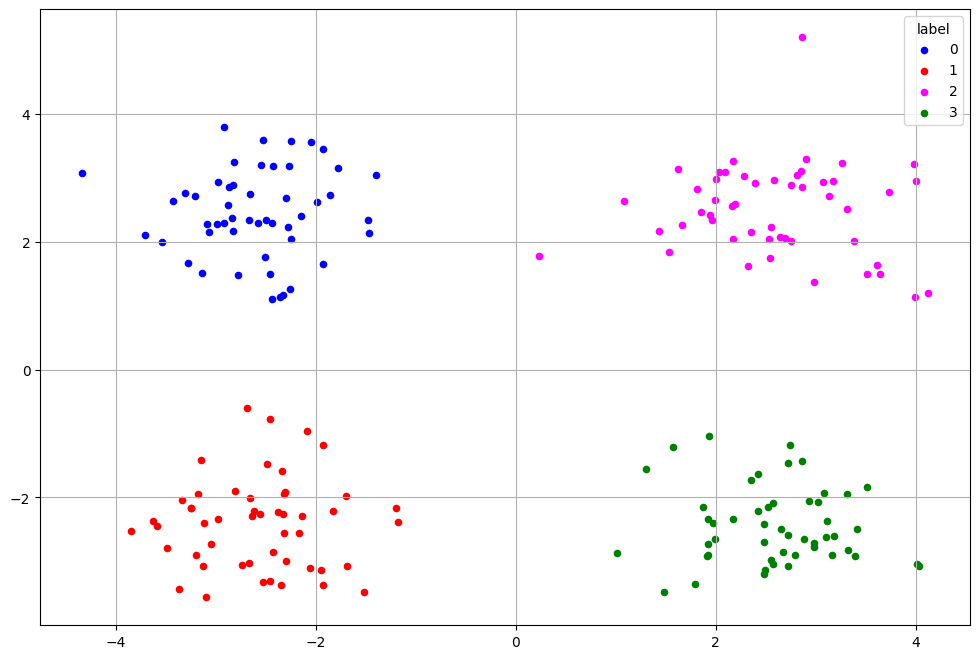

In [104]:
centers = [[-2.5, 2.5], [-2.5, -2.5], [2.5, 2.5], [2.5, -2.5]]
x, y = skds.make_blobs(
    n_samples=200, 
    centers=centers,
    cluster_std=0.7,
    random_state=42
    )
vizualise_data(x, y, cluster_num=len(centers))

In [105]:
dataset2 = create_dataframe(x, y)
dataset2

,x,y,label,kmeans
0,-1.518044,-3.481296,1,0
1,-2.634653,-2.288917,1,0
2,-1.474046,2.341957,0,0
3,2.725903,-3.079062,3,0
4,-2.350134,-3.372017,1,0
...,...,...,...,...
195,-2.824392,2.173989,0,0
196,-2.319715,-2.552112,1,0
197,3.129720,2.715110,2,0
198,3.386838,2.004631,2,0


### 3. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_moons``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons).

![dataset1](expected_outputs/dataset3.png)

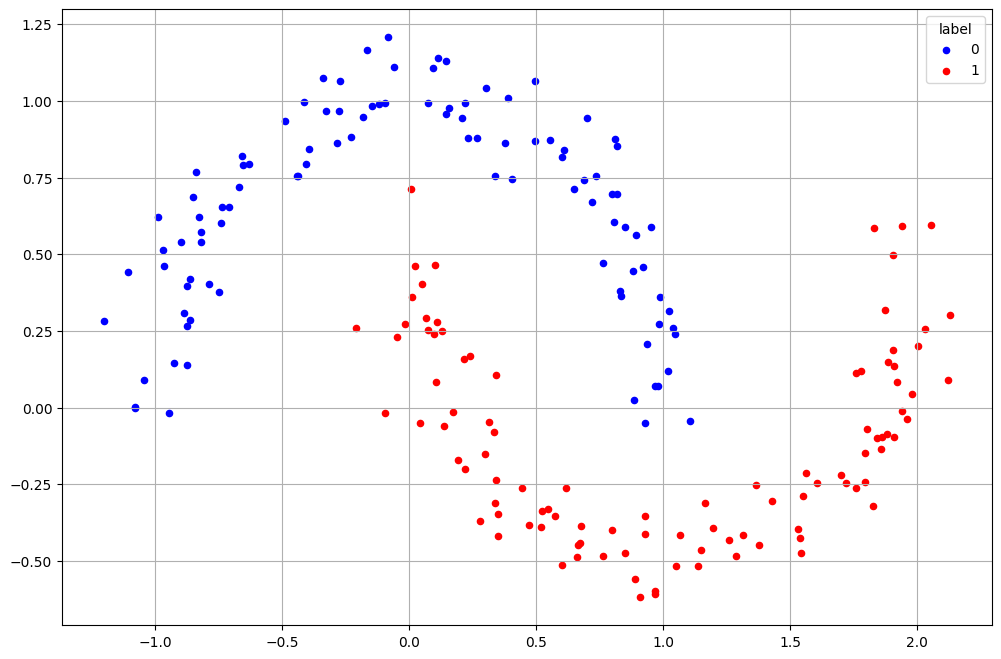

In [106]:
x, y = skds.make_moons(
    n_samples=200, 
    random_state=42,
    noise=0.09
    )
vizualise_data(x, y, cluster_num=2)

In [107]:
dataset3 = create_dataframe(x, y)
dataset3

,x,y,label,kmeans
0,-1.043679,0.088658,0,0
1,0.919419,0.457562,0,0
2,0.649114,0.711095,0,0
3,1.196694,-0.394259,1,0
4,0.297283,-0.151585,1,0
...,...,...,...,...
195,-0.016301,0.273538,1,0
196,0.828354,0.380730,0,0
197,-1.200678,0.281928,0,0
198,1.840393,-0.100550,1,0


### 4. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_circles``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles).

![dataset1](expected_outputs/dataset4.png)

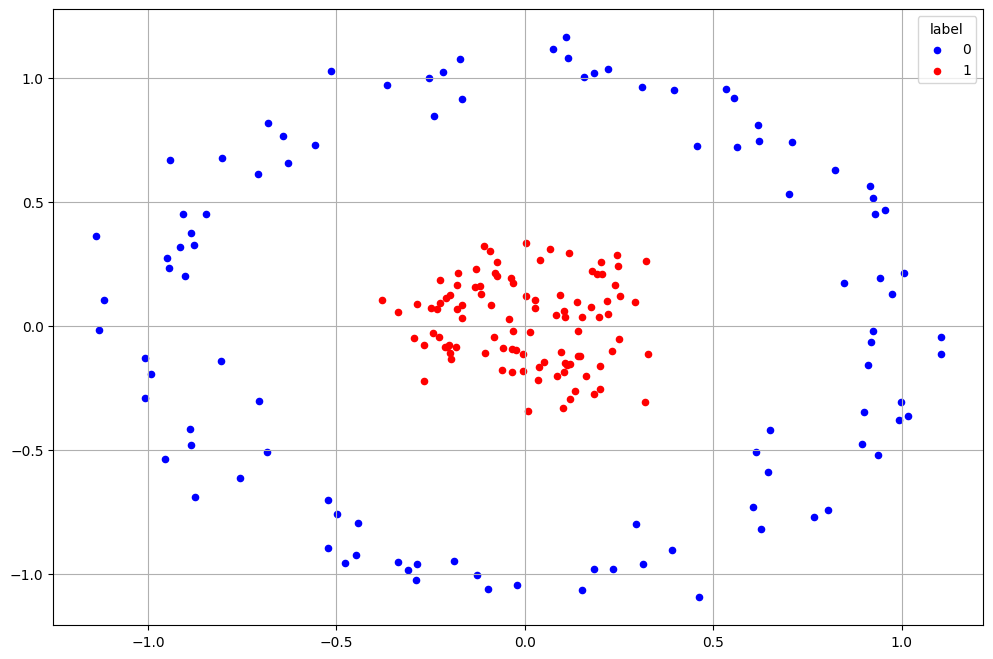

In [108]:
x, y = skds.make_circles(
    n_samples=200, 
    random_state=42,
    noise=0.09,
    factor=0.2
    )
vizualise_data(x, y, cluster_num=2)

In [109]:
dataset4 = create_dataframe(x, y)
dataset4

,x,y,label,kmeans
0,0.899333,-0.346952,0,0
1,0.618369,0.808353,0,0
2,-0.239960,0.847575,0,0
3,-0.245042,-0.026768,1,0
4,-0.109641,0.321019,1,0
...,...,...,...,...
195,0.151583,0.036414,1,0
196,0.562851,0.721448,0,0
197,0.651058,-0.420136,0,0
198,0.084861,-0.201358,1,0


## 2. část - K-means

Implementujte K-means algoritmus, aplikujte ho na všechny 4 datasety a zobrazte výsledky algoritmu. Zároveň se pokuste zvýraznit centroid ve vizualizaci výsledku. Pro aplikaci K-means můžete použít počet tříd v každém datasetu (není třeba hledat parametr K automaticky).

In [162]:
def kmeans(df, K, max_iters=100, eps=1e-4):
    ## Step 1:
    # randomly choose K-centroids as initial
    indices = np.random.choice(df.index, K, replace=False)
    centroids = df.loc[indices, ['x', 'y']].values
    prev_criterion = float('inf')

    for i in range(max_iters):
        ## Step 2:
        # calculate distance from each point to each centroid
        distances = df[['x', 'y']].values[:, np.newaxis] - centroids
        # assign each point to the nearest centroid and update the 'kmeans' column
        df['kmeans'] = np.argmin(distances, axis=1)

        ## Step 3:
        new_centroids = []
        for k in range(K):
            # find cluster points
            cluster_points = df[df['label'] == k][['x', 'y']]
            # count new centroid as mean point
            new_centroids.append(cluster_points.mean().values)
        new_centroids = np.array(new_centroids)
        
        ## Step 4:
        criterion = 0
        for k in range(K):
            # find cluster points coords
            cluster_points = df[df['label'] == k][['x', 'y']].values
            # update criterion as 
            criterion += np.sum((cluster_points - new_centroids[k]))

        if abs(prev_criterion - criterion) < eps:
            print(f"Algorithm converged in {i + 1} iterations.")
            break
        
        prev_criterion = criterion
    else:
        print("Reached maximum iterations and algorithm didn't converge.")

    return new_centroids

2

<<< DATASET 1 >>>
Algorithm converged in 2 iterations.


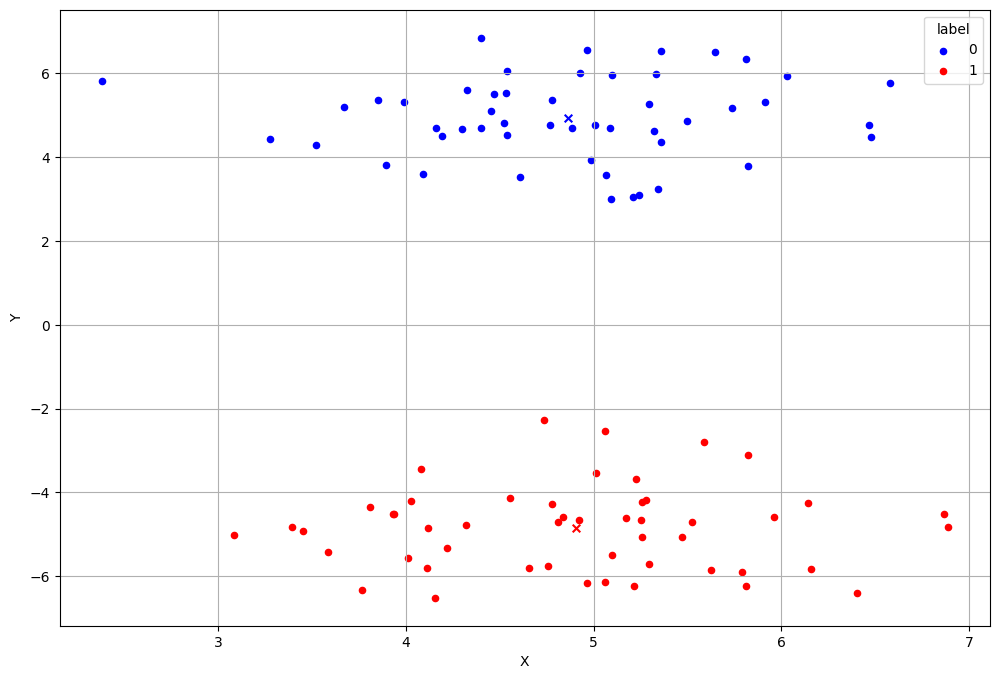

<<< DATASET 2 >>>
Algorithm converged in 2 iterations.


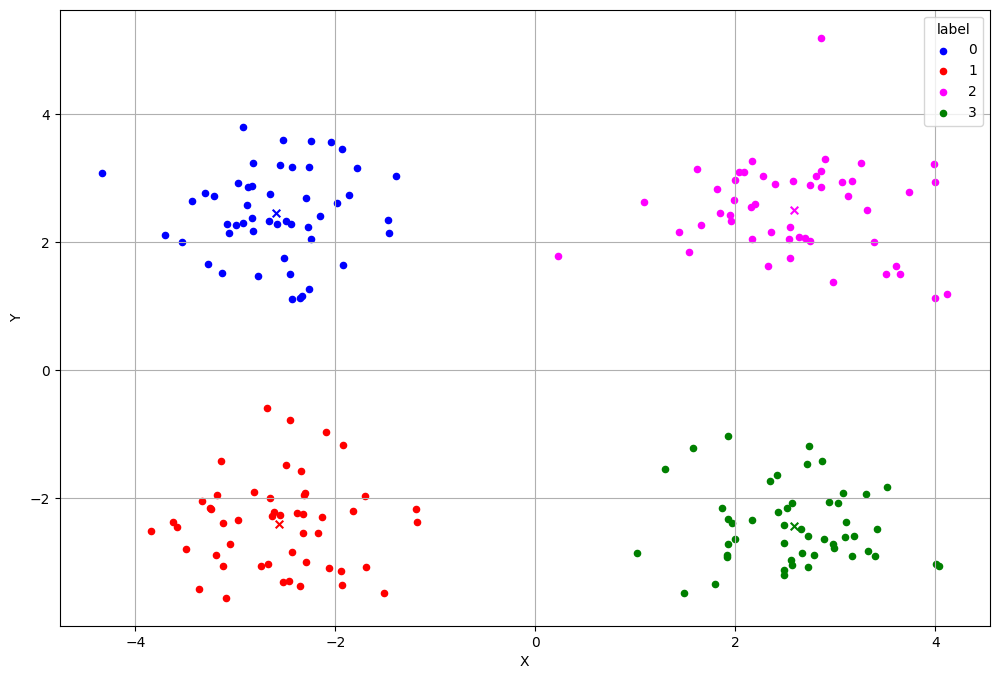

<<< DATASET 3 >>>
Algorithm converged in 2 iterations.


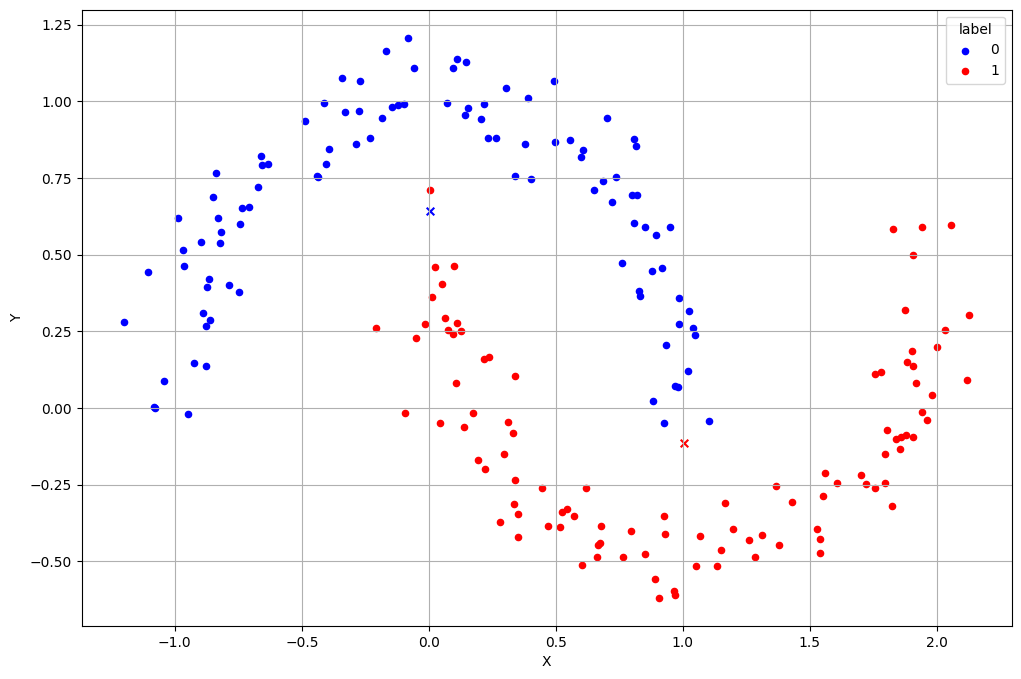

<<< DATASET 4 >>>
Algorithm converged in 2 iterations.


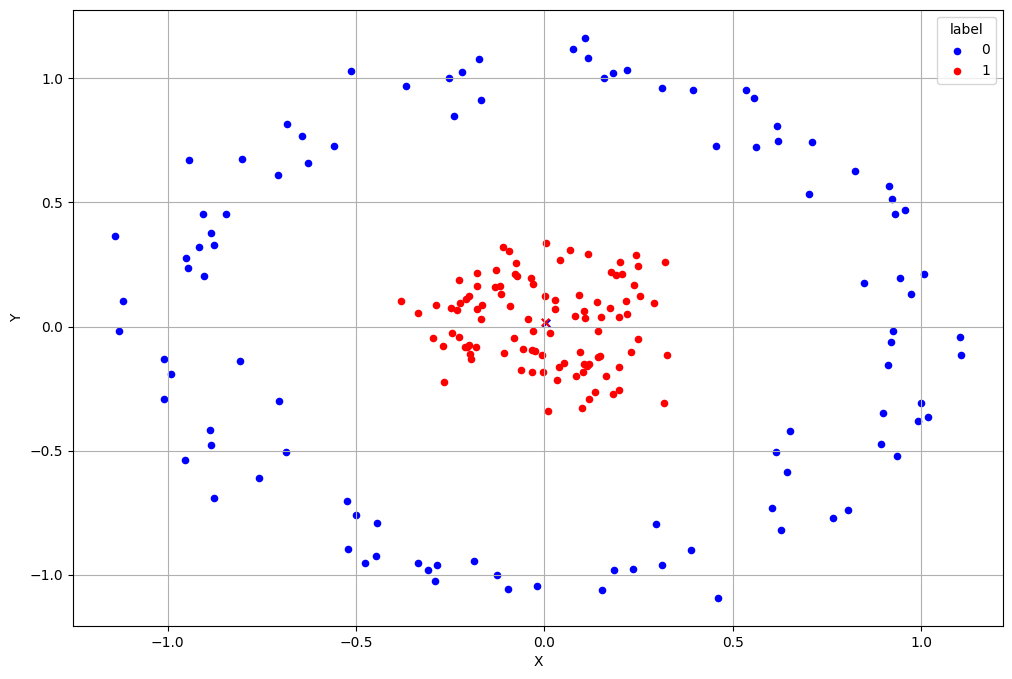

In [171]:
# Apply the K-means algorithm
dts = [dataset1, dataset2, dataset3, dataset4]
# dts = [dataset1]

for n, dataset in enumerate(dts):
    print(f"<<< DATASET {n+1} >>>")
    K = dataset.label.unique().size  # Number of clusters
    centroids = kmeans(dataset, K)

    x = dataset[['x', 'y']].values
    y = dataset['label']
    
    vizualise_data(x, y, cluster_num=K, centroids=centroids)

## Bonus - K-means s nalezenou hodnotou K

Zkuste najít algoritmy, které umožňují hledat hodnotu K pro K-means. Implementujte alespoň jeden z nich a ověřte, že funguje. Ověření proveďte nejen na našich předchozích datasetech, ale zkuste si vygenerovat i dataset s větším množstvím tříd (10-20). (1 bod)